# Plotting results

#### Jukes Liu. Last modified 10-27-2019.

In [76]:
import numpy as np
# import os
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import matplotlib.image as mpimg
import cv2
import pandas as pd    
# from time import sleep
# from IPython.display import clear_output
# import scipy.stats
import datetime
# import shutil

csvpaths = '/home/jukes/Documents/Sample_glaciers/'
basepath = '/media/jukes/jukes1/LS8aws/'
massorsize = "mass"
# BoxIDs = ['120', '160', '174','191', '220', '225', '240', '245', '270', '277', '279', '285', '290']
BoxIDs = ['001', '002', '120','174']

### Load in csv files with terminus position and change rates for the glaciers

In [77]:
dfs = []
for BoxID in BoxIDs:
    df = pd.read_csv(csvpaths+'Tpos_Box'+BoxID+'_flowline50_filtered.csv', sep=',', dtype=str, header=0)
    print(df.shape)
    dfs.append(df)

(303, 10)
(182, 10)
(209, 10)
(111, 10)


### Convert all dates to datetime objects and all terminus positions and changerates to floats

In [78]:
#maximum terminus position for the glaciers
# max_pos = {'120' : 650.0, '160': 570.0, '174' : 820.0, '191': 1575.0,
#            '220': 1300.0, '225': 1470.0, '240': 750, '245': 670.0, '270': 620, '277': 750,
#           '279':1620, '285': 350, '290': 400}
max_pos = {'001': 690, '002': 3400, '120': 595, '174': 810}

In [79]:
#Turn datetimes from datetime_df into DateTime objects
import os
os.chdir('/home/jukes/automated-glacier-terminus') #import necessary functions:
from automated_terminus_functions import to_datetimes

#grab the datetime strings
for df in dfs:
    to_datetimes(df)
    
    term_positions = list(df['tpos'])
    changerates = list(df['changerate'])
    BoxID = list(df['BoxID'])[0]
    print(BoxID)
    
    max_position = max_pos[BoxID]
    tpositions = []
    changes = []
    
    for tpos in term_positions:
        tpos = float(tpos)
        tpos = tpos - max_position
        tpositions.append(tpos)
        
    for crate in changerates:
        crate = float(crate)
        changes.append(crate)

    #add the datetime objects back into the datetime column
    df['tpos'] = tpositions
    df['changerate'] = changes

001
002
120
174


## Plot:

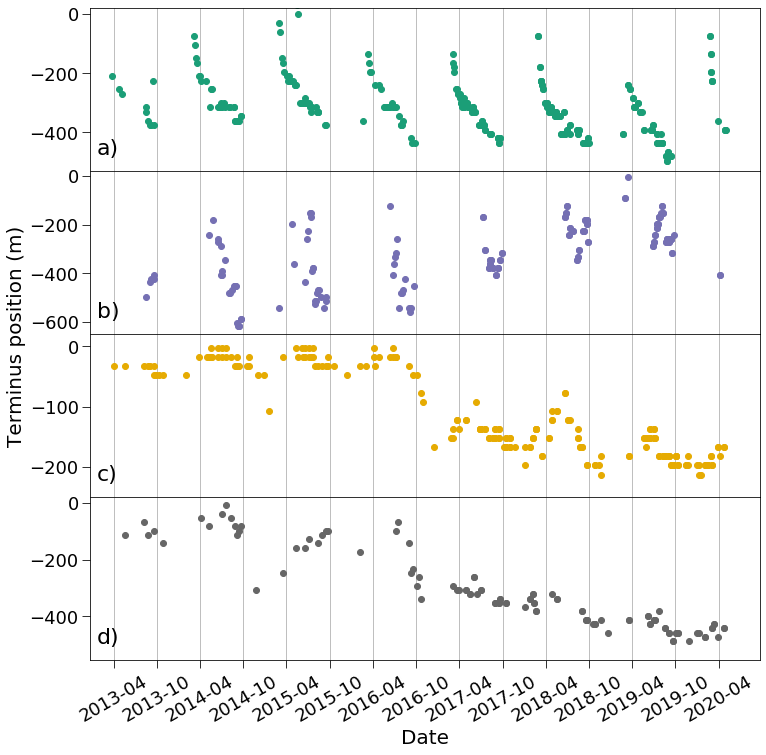

In [87]:
nplots = len(BoxIDs) # set number of subplots
colors = pl.cm.Dark2(np.linspace(0,1, nplots)) # generate colors using the plasma colormap
panels = ['a)', 'b)', 'c)', 'd)']
# ylims_bottom = [-250, -350, -400,-1075, -100, -375 , -175, -100, -450, -350, -250, -250, -400] # set different y limits for each plot
ylims_bottom = [-530, -650, -250, -555]

fig, axs = plt.subplots(nplots, 1, sharex=True, figsize=(12,12))
fig.subplots_adjust(hspace=0) # Remove horizontal space between axes

for i in range(0, nplots):
    ax = axs[i]; df = dfs[i]; col = colors[i]; BoxID = BoxIDs[i] # grab repeated values   
    ax.plot(df['datetimes'], df['tpos'], color=col, marker='o', markersize=6, linewidth=0) # plot
    ax.set_ylim(ylims_bottom[i], 20) # y limits
    ax.set_xlim(datetime.date(2013, 1, 1), datetime.date(2020, 10, 1))
#     ax.set_ylabel('Box'+BoxID, fontsize=14, color='k') # y-axis label for subplot
    ax.tick_params(direction='out', colors='k', size=8, labelsize=18) # tick parameters
    ax.tick_params(axis='x', labelrotation=30, labelsize=18) # rotate xticks

    #set date labels and spacing:
    ax.set_xticks([datetime.date(2013, 4, 10), datetime.date(2013, 10, 10), 
                    datetime.date(2014, 4, 10), datetime.date(2014, 10, 10),
                    datetime.date(2015, 4, 10), datetime.date(2015, 10, 10),
                   datetime.date(2016, 4, 10), datetime.date(2016, 10, 10),
                   datetime.date(2017, 4, 10),datetime.date(2017, 10, 10), 
                 datetime.date(2018, 4, 10),datetime.date(2018, 10, 10),
                 datetime.date(2019, 4, 10),datetime.date(2019, 10, 10),
                 datetime.date(2020, 4, 10)])
    ax.set_xticklabels(['2013-04', '2013-10', 
                        '2014-04', '2014-10',
                        '2015-04', '2015-10',
                        '2016-04', '2016-10',
                        '2017-04', '2017-10',
                        '2018-04', '2018-10', 
                        '2019-04', '2019-10',
                        '2020-04', ])
    ax.grid(axis='x') # turn on grid lines
    
    ax.text(0.01, 0.2, panels[i], fontsize=22, transform=ax.transAxes, verticalalignment='top',
           fontdict={'weight': 'normal'}) # panel labels (a, b, c, d)
    
#Set common x label
for ax in axs:
    ax.set_xlabel('Date', fontsize=20)
#Set common y label
fig.text(0.04, 0.5, 'Terminus position (m)', va='center', ha='center', rotation='vertical', fontsize=20)

# #Save figure
plt.savefig(csvpaths+"/Figures/Tpos_timeseries_"+str(datetime. datetime. today())[:-16]+".png", dpi=500, bbox_inches='tight')

plt.show()

In [81]:
# df3.sort_values(by='term_position', ascending=False)